In [101]:
# import modules

from pathlib import Path
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords


import matplotlib.pyplot as plt

# data analysis and manipulation tool 
import pandas as pd
# natural language token analyzer package
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# define data location
data_dir = Path().resolve().parent / "data"
# creating one big dataframe consisting of arguments labels and keypoints (only with true label)

# read data for training
df_arguments_train = pd.read_csv(data_dir / "arguments_train.csv",encoding="utf-8")
df_key_points_train = pd.read_csv(data_dir / "key_points_train.csv",encoding="utf-8")
df_key_points_train = df_key_points_train[['key_point','key_point_id']]
df_labels_train = pd.read_csv(data_dir / "labels_train.csv")

# merge labels with keypoints
df_labels_train=df_labels_train.merge(df_key_points_train,on='key_point_id')
# filter false labels
df_labels_train=df_labels_train[df_labels_train['label']!=0]

# merge labels with arguments
df_arguments_train=df_arguments_train.merge(df_labels_train,on='arg_id')
df_arguments_labels_key_points_train = df_arguments_train.copy()
df_arguments_labels_key_points_train

def select_topic(df_arguments_labels_key_points_train, topic):
    df_topic = df_arguments_labels_key_points_train[df_arguments_labels_key_points_train['topic']==topic]
    args = df_topic.argument.unique()
    d_args = {}
    for arg in args:
        df = df_topic[df_topic['argument']==arg]
        keypoints_1 = list(df[df['stance']==1].key_point)
        keypoints_ = list(df[df['stance']==-1].key_point)
        d_args[arg] = {"stance 1": keypoints_1, "stance -1":keypoints_}
    return d_args
topic = "Homeschooling should be banned"
d = select_topic(df_arguments_labels_key_points_train, topic)
d["it is unfair to make decisions on a parents behalf in terms of what would be best for their child's education"]

[nltk_data] Downloading package punkt to /home/miss-luu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/miss-
[nltk_data]     luu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'stance 1': [],
 'stance -1': ['Parents should be permitted to choose the education of their children']}

In [102]:
def lowercase_lemma(row):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    row = [lemmatizer.lemmatize(e) for e in row]
    row = list(map(lambda x: x.lower(), row))
    return row

In [103]:
# visualize most common tokens
import numpy as np
def visualize_word_frequency(df_arguments,top_k=50,token_kind='argument_tokens'):
    fig,ax=plt.subplots(figsize=(8,6))
    c=Counter()
    for _,argument in df_arguments.iterrows():
        c.update(argument[token_kind])


    values,counts=zip(*c.most_common(top_k))    
    plt.bar(values,counts)

    plt.xticks(rotation=90)
    fig.savefig('pictures/'+token_kind+'.png') 
    plt.show()
    
    return values

In [104]:
# tokenizes the arguments and appends them to the unified data_frame
df_arguments_labels_key_points_train['argument_tokens_lemma'] = df_arguments_labels_key_points_train['argument'].apply(lambda row: lowercase_lemma(nltk.regexp_tokenize(row, r'\w+')))
# tokenizes the keypoints and appends them to the unified data_frame
df_arguments_labels_key_points_train['key_point_tokens_lemma'] = df_arguments_labels_key_points_train['key_point'].apply(lambda row: lowercase_lemma(nltk.regexp_tokenize(row, r'\w+')))
# tokenizes the topics and appends them to the unified data_frame
df_arguments_labels_key_points_train['topic_tokens_lemma'] = df_arguments_labels_key_points_train['topic'].apply(lambda row: lowercase_lemma(nltk.regexp_tokenize(row, r'\w+')))

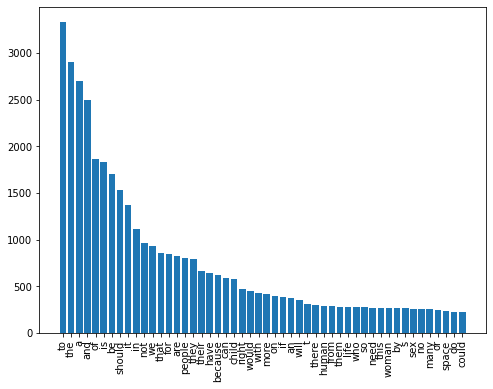

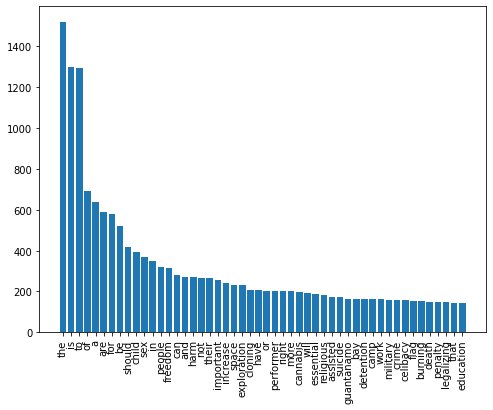

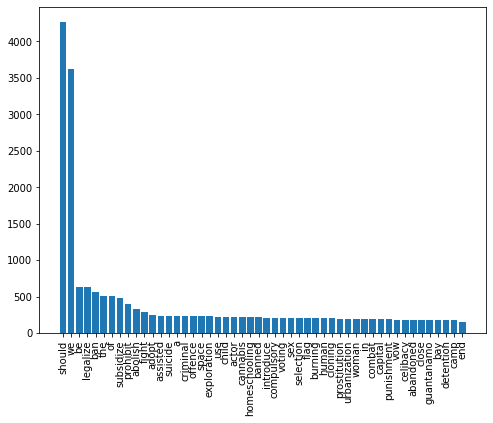

In [105]:
# most common tokens in arguments and keypoints without stopwords
argument_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_tokens_lemma')
key_point_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_tokens_lemma')
topic_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_tokens_lemma')

In [106]:
# remove stopwords
stopword = set(stopwords.words('english'))
df_arguments_labels_key_points_train['argument_tokens_lemma_not_stopwords'] = df_arguments_labels_key_points_train['argument_tokens_lemma'].apply(lambda tokens: [token for token in tokens if token not in stopword])

df_arguments_labels_key_points_train['key_point_tokens_lemma_not_stopwords'] = df_arguments_labels_key_points_train['key_point_tokens_lemma'].apply(lambda tokens: [token for token in tokens if token not in stopword])

df_arguments_labels_key_points_train['topic_tokens_lemma_not_stopwords'] = df_arguments_labels_key_points_train['topic_tokens_lemma'].apply(lambda tokens: [token for token in tokens if token not in stopword])

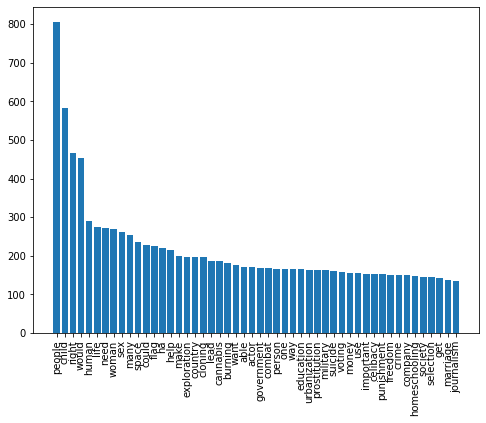

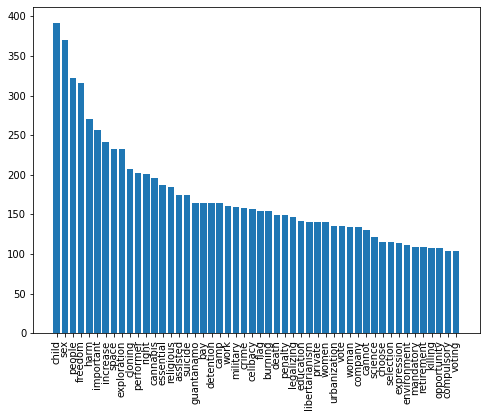

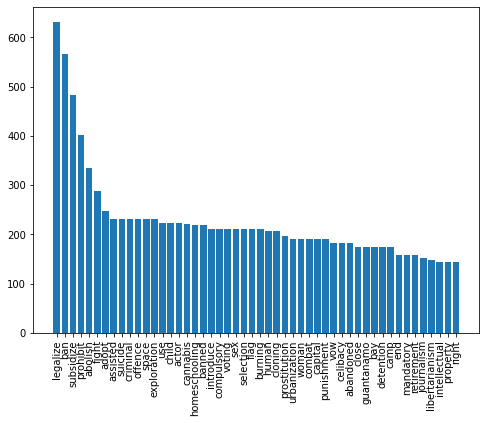

In [107]:
# most common tokens in arguments and keypoints without stopwords
argument_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_tokens_lemma_not_stopwords')
key_point_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_tokens_lemma_not_stopwords')
topic_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_tokens_lemma_not_stopwords')

In [108]:
def tuple_ngram_to_string(l):
    nl = []
    for e in l: 
        nl.append("_".join(e))
    return nl
# generates 3_grams and 2_grams for arguments
df_arguments_labels_key_points_train['argument_2_grams_lemma'] = df_arguments_labels_key_points_train['argument_tokens_lemma'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['argument_3_grams_lemma'] = df_arguments_labels_key_points_train['argument_tokens_lemma'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))
# generates 3_grams and 2_grams for key_points
df_arguments_labels_key_points_train['key_point_2_grams_lemma'] = df_arguments_labels_key_points_train['key_point_tokens_lemma'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['key_point_3_grams_lemma'] = df_arguments_labels_key_points_train['key_point_tokens_lemma'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))
# generates 3_grams and 2_grams for topics
df_arguments_labels_key_points_train['topic_2_grams_lemma'] = df_arguments_labels_key_points_train['topic_tokens_lemma'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['topic_3_grams_lemma'] = df_arguments_labels_key_points_train['topic_tokens_lemma'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))



# generates 3_grams and 2_grams for arguments
df_arguments_labels_key_points_train['argument_2_grams_lemma_not_stopwords'] = df_arguments_labels_key_points_train['argument_tokens_lemma_not_stopwords'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['argument_3_grams_lemma_not_stopwords'] = df_arguments_labels_key_points_train['argument_tokens_lemma_not_stopwords'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))
# generates 3_grams and 2_grams for key_points
df_arguments_labels_key_points_train['key_point_2_grams_lemma_not_stopwords'] = df_arguments_labels_key_points_train['key_point_tokens_lemma_not_stopwords'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['key_point_3_grams_lemma_not_stopwords'] = df_arguments_labels_key_points_train['key_point_tokens_lemma_not_stopwords'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))
# generates 3_grams and 2_grams for topics
df_arguments_labels_key_points_train['topic_2_grams_lemma_not_stopwords'] = df_arguments_labels_key_points_train['topic_tokens_lemma_not_stopwords'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,2))))
df_arguments_labels_key_points_train['topic_3_grams_lemma_not_stopwords'] = df_arguments_labels_key_points_train['topic_tokens_lemma_not_stopwords'].apply(lambda row: tuple_ngram_to_string(list(ngrams(row,3))))


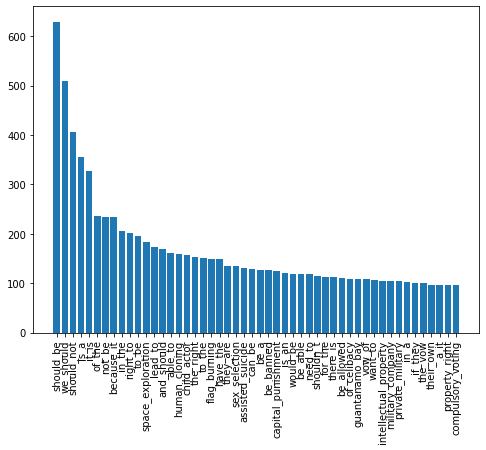

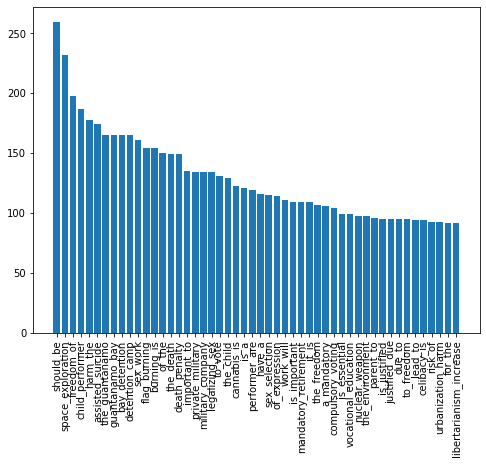

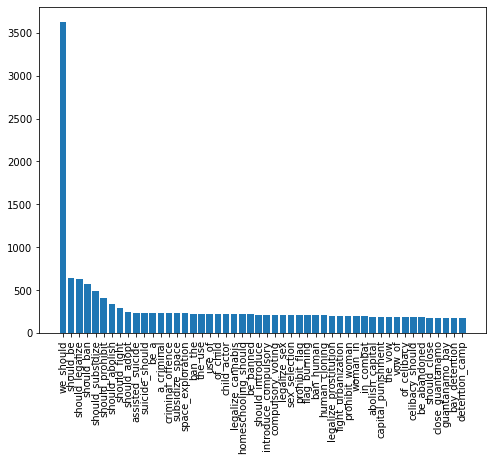

In [109]:
# most common 2_grams in arguments and keypoints 
argument_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_2_grams_lemma')
key_point_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_2_grams_lemma')
topic_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_2_grams_lemma')

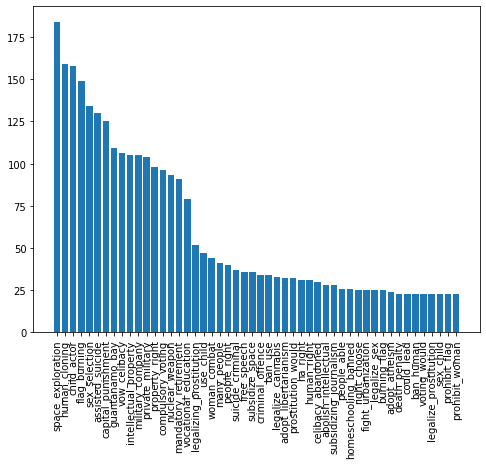

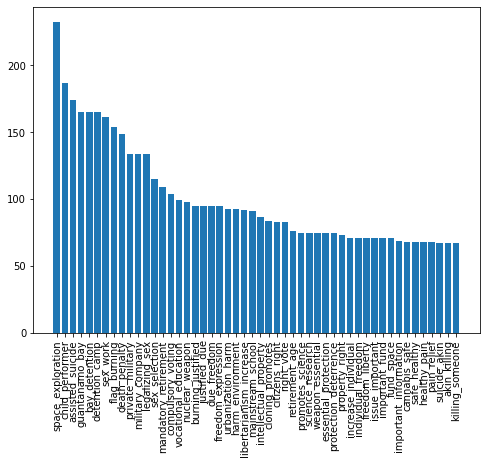

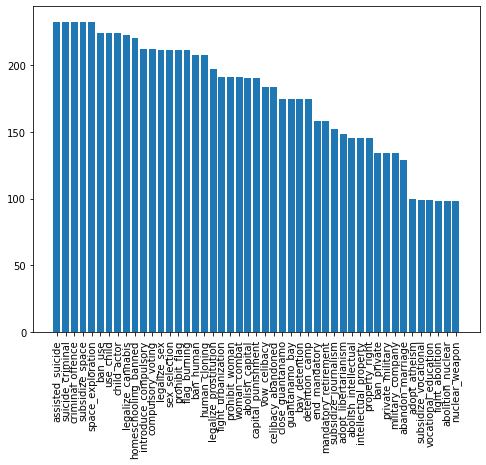

In [110]:
# most common 2_grams in arguments and keypoints 
argument_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_2_grams_lemma_not_stopwords')
key_point_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_2_grams_lemma_not_stopwords')
topic_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_2_grams_lemma_not_stopwords')

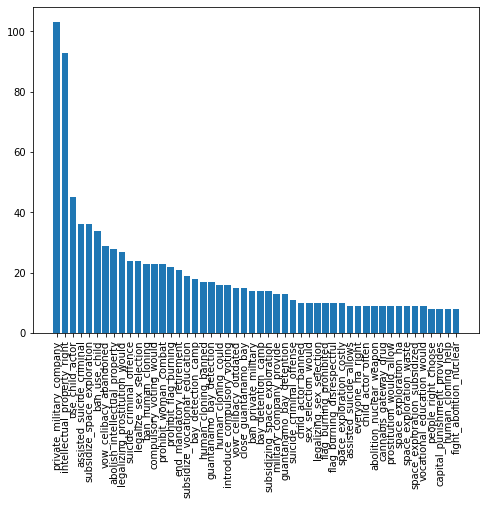

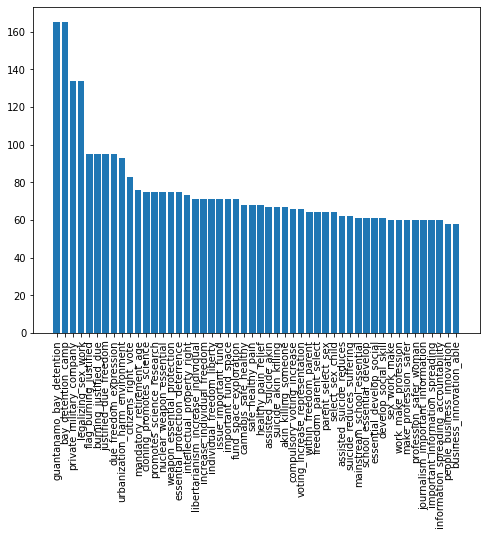

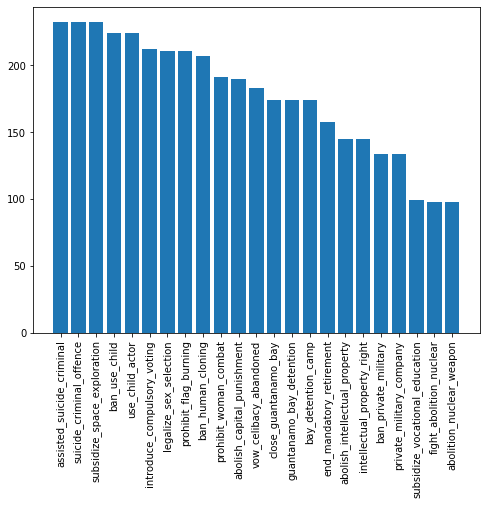

In [111]:
# most common 2_grams in arguments and keypoints 
argument_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_3_grams_lemma_not_stopwords')
key_point_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_3_grams_lemma_not_stopwords')
topic_words_2grams=visualize_word_frequency(df_arguments_labels_key_points_train,50,'topic_3_grams_lemma_not_stopwords')

# Visualisierung: Keypoints and Arguments

In [112]:
def visualize_word_frequency_by_topic_stance(topic_id, df_arguments,top_k=50,token_kind='argument_tokens', stance=1):
    fig,ax=plt.subplots(figsize=(8,6))
    c=Counter()
    for _,argument in df_arguments.iterrows():
        c.update(argument[token_kind])


    values,counts=zip(*c.most_common(top_k))    
    plt.bar(values,counts)

    plt.xticks(rotation=90)
    if stance==1:
        fig.savefig('pictures/topics/stance_1/'+str(topic_id)+"_"+token_kind+'.png') 
    else:
        fig.savefig('pictures/topics/stance_^1/'+str(topic_id)+"_"+token_kind+'.png') 
    plt.show()
    
    return values

In [113]:
topic = "Homeschooling should be banned"
d = select_topic(df_arguments_labels_key_points_train, topic)
d["it is unfair to make decisions on a parents behalf in terms of what would be best for their child's education"]

{'stance 1': [],
 'stance -1': ['Parents should be permitted to choose the education of their children']}

In [114]:
def get_keypoints_per_stance(d, stance):
    args = []
    kps = []
    for k, v in d.items():
        if v[stance] !=[]:
            args.append(k)
            kps.append(v[stance])
    import itertools
    kps= list(itertools.chain(*kps))
    return args, kps
stance="stance 1"
args, kps = get_keypoints_per_stance(d, stance)
#100 args for this topic
#100 keypoints, each arg has a keypoint

In [115]:
#Beziehung zwischen topic and args per stance
def df_args_per_stance(df_arguments_labels_key_points_train, topic, stance):
    df = df_arguments_labels_key_points_train[(df_arguments_labels_key_points_train['topic']==topic) & (df_arguments_labels_key_points_train['stance']==stance)]
    return df

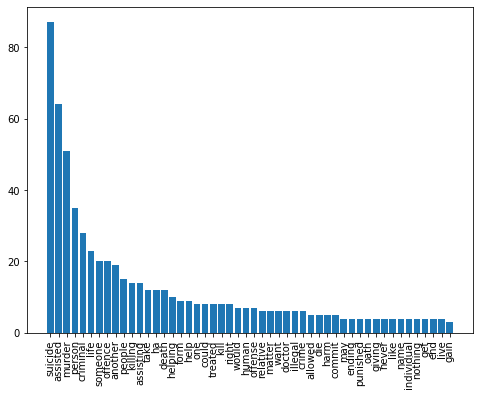

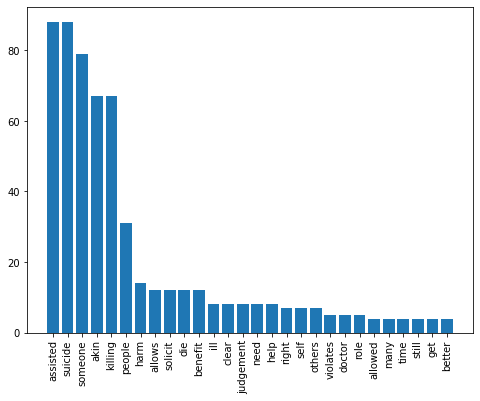

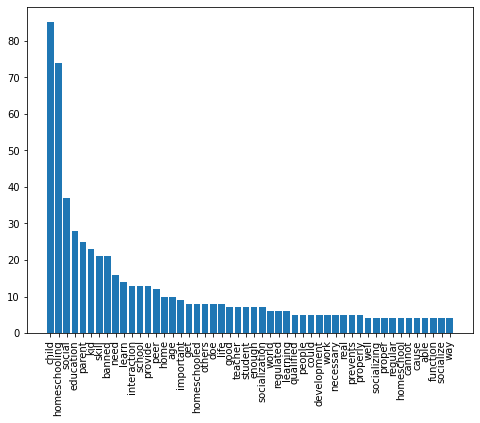

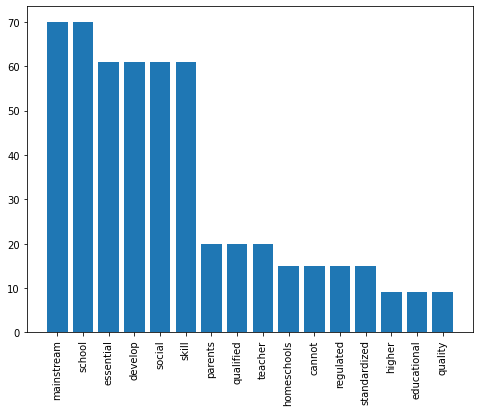

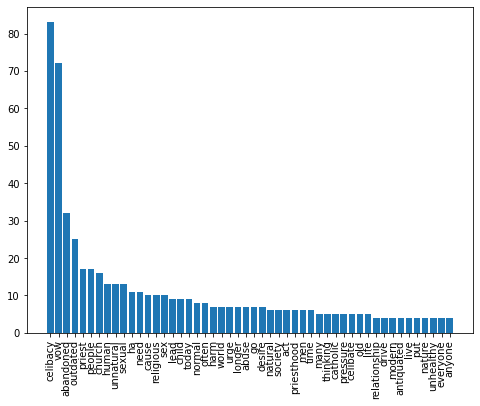

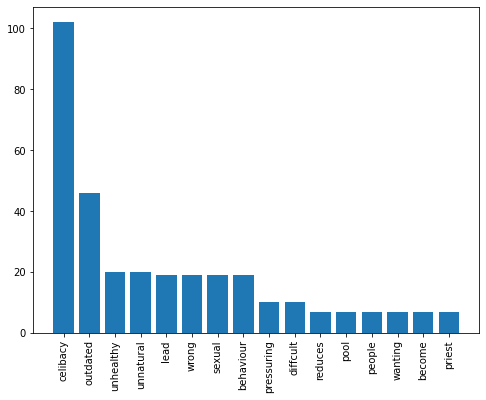

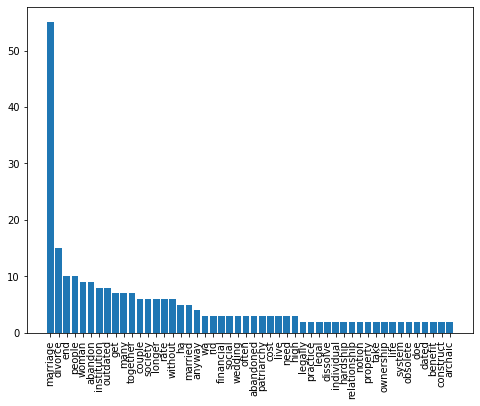

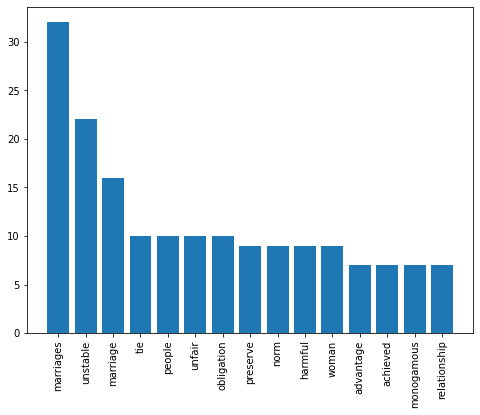

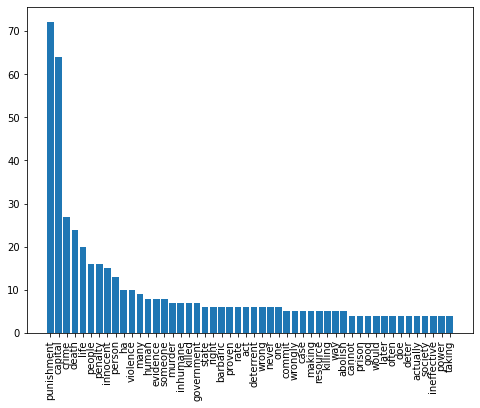

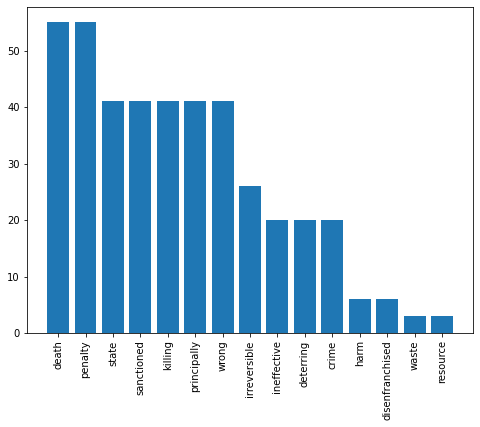

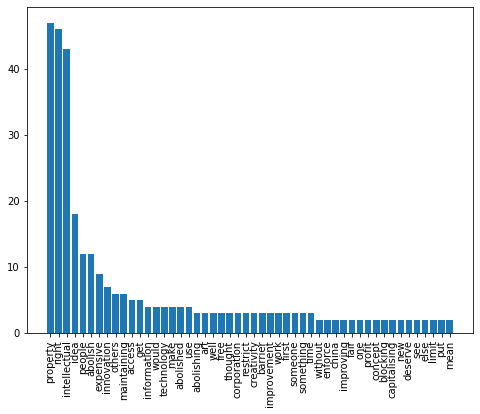

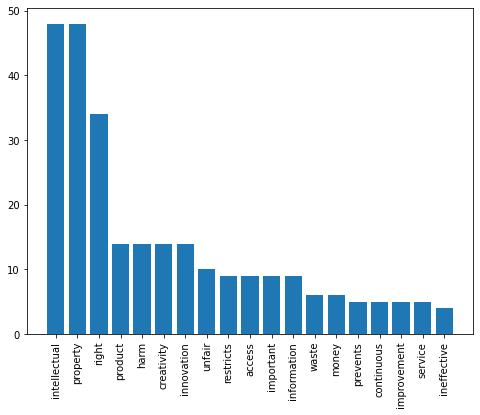

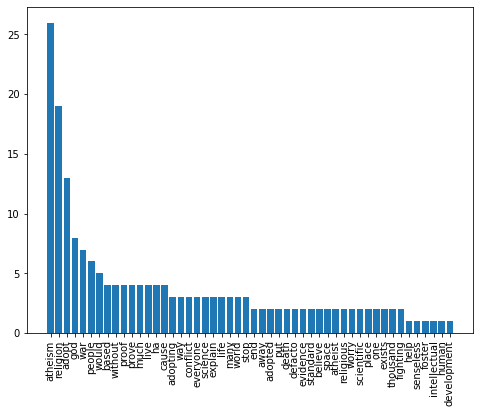

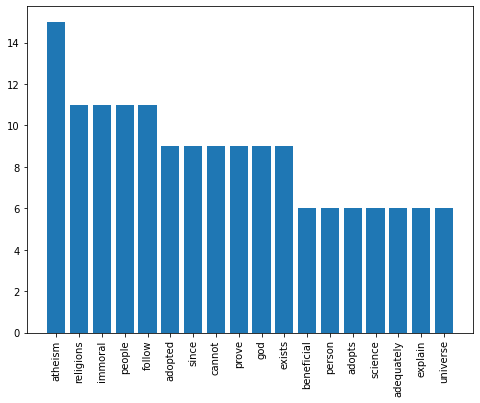

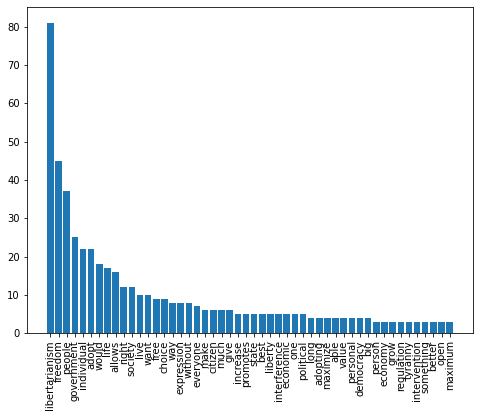

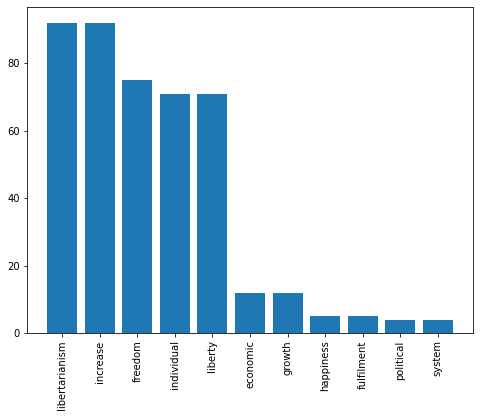

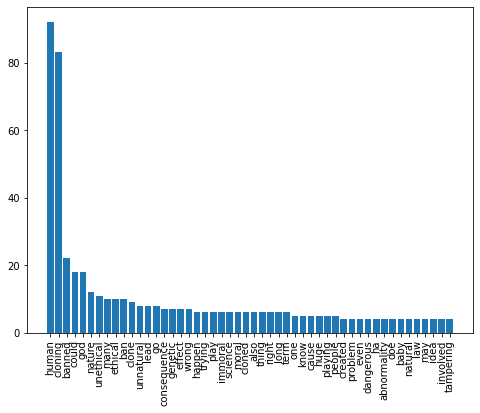

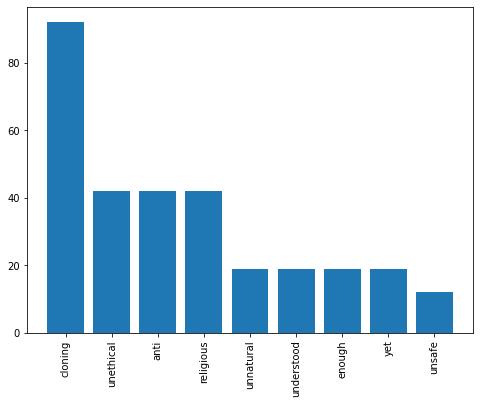

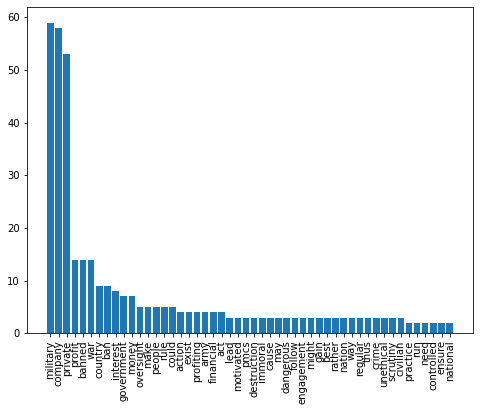

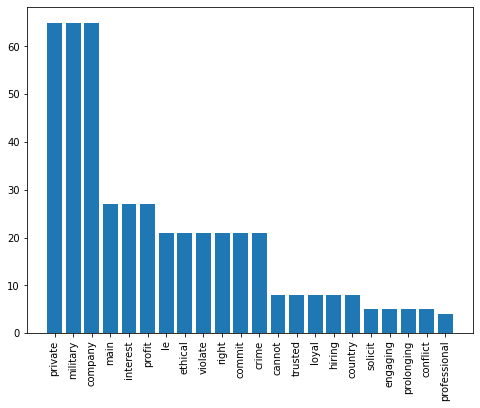

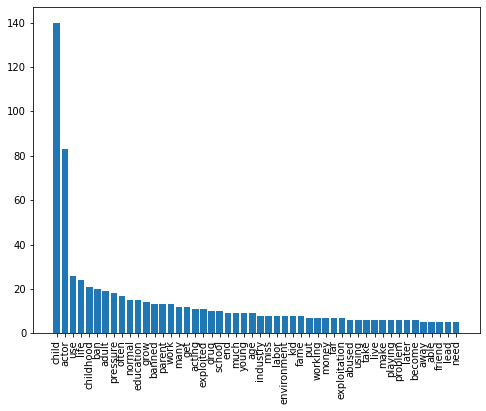

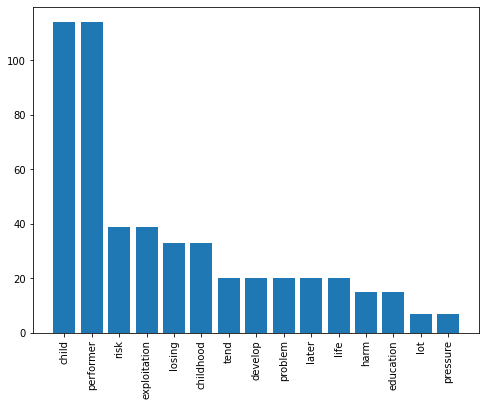

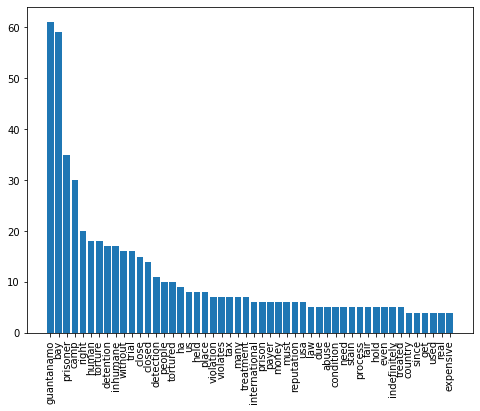

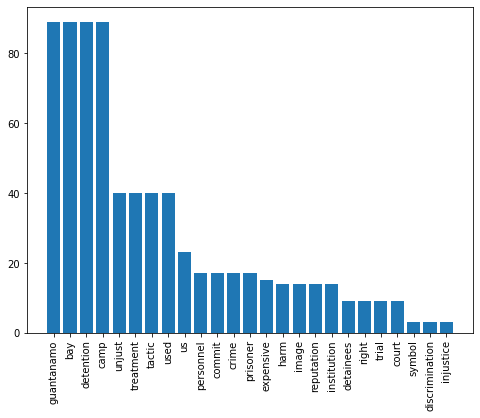

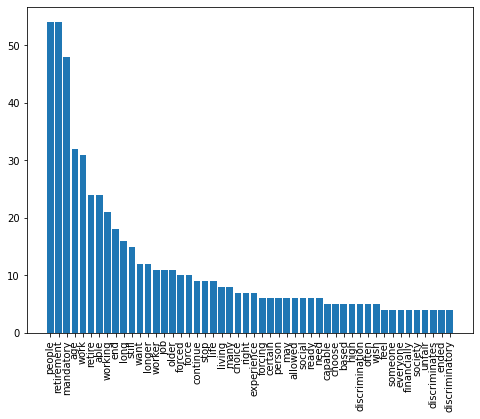

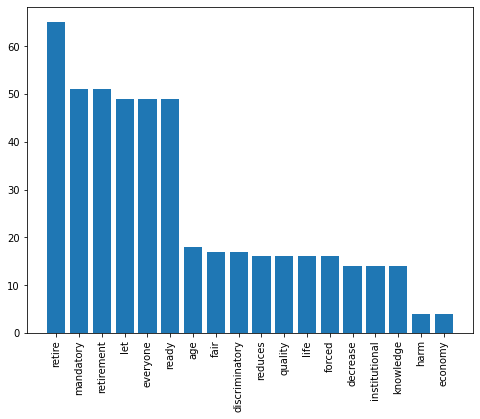

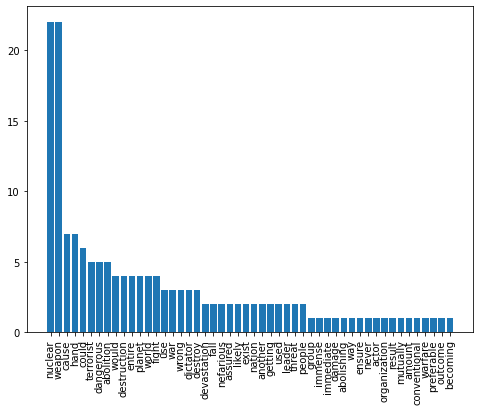

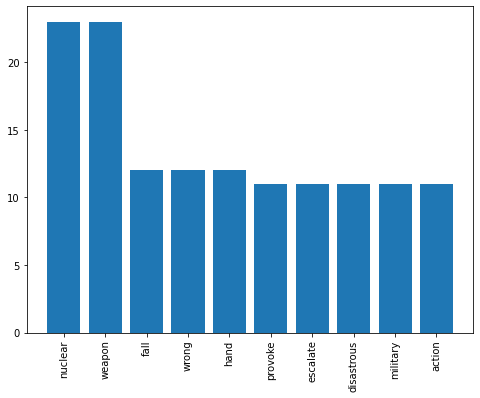

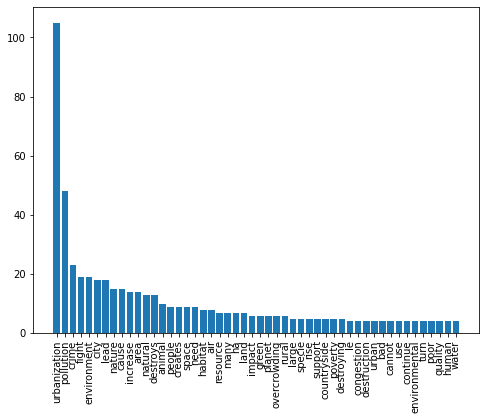

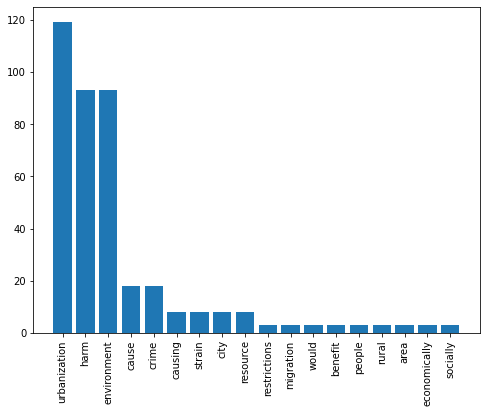

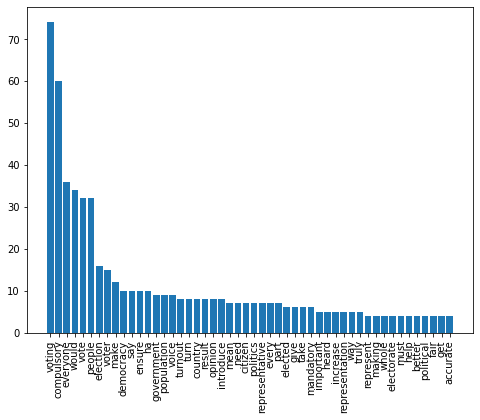

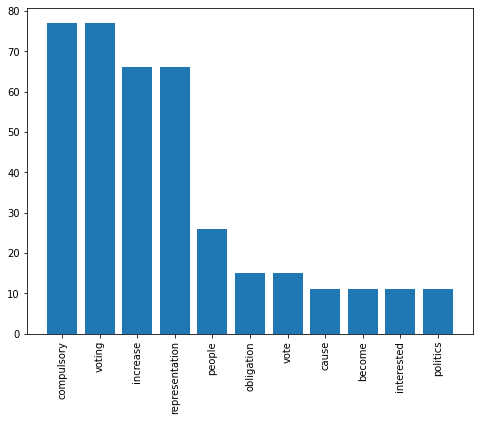

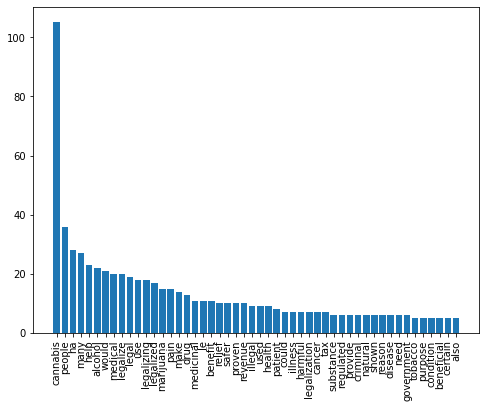

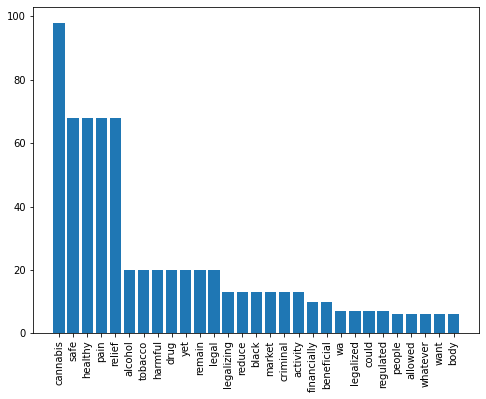

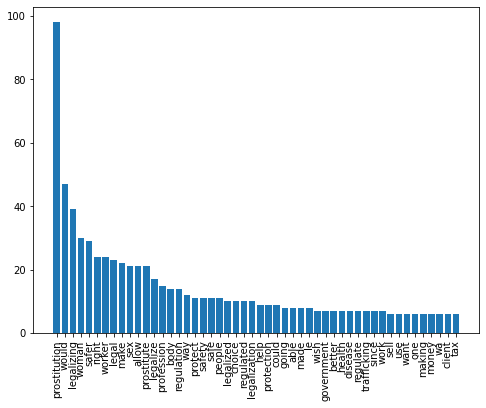

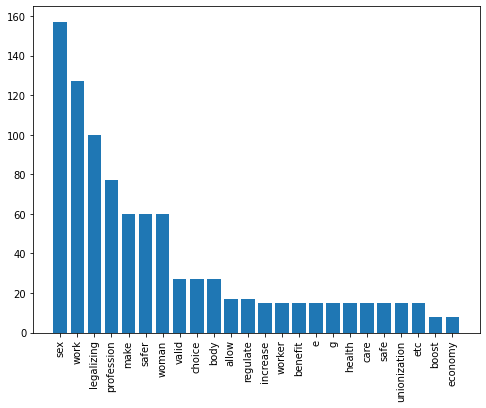

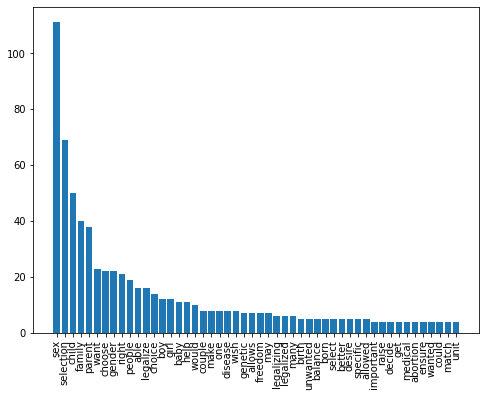

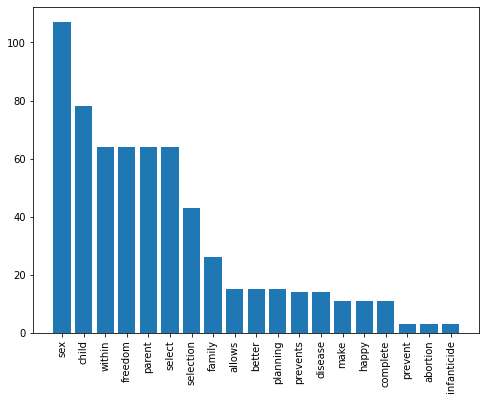

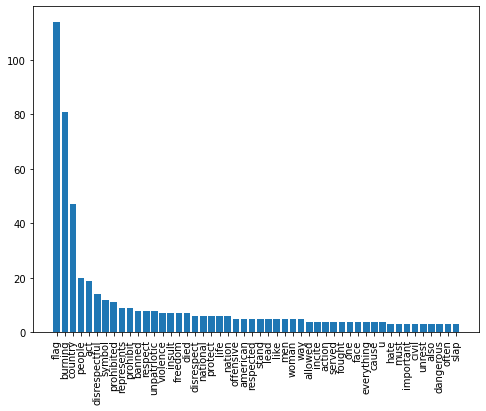

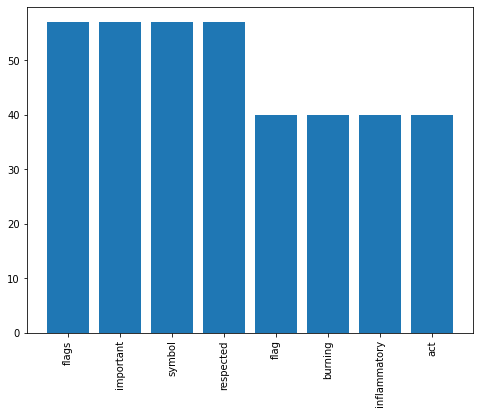

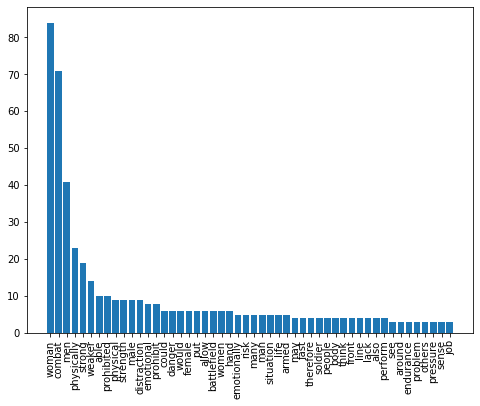

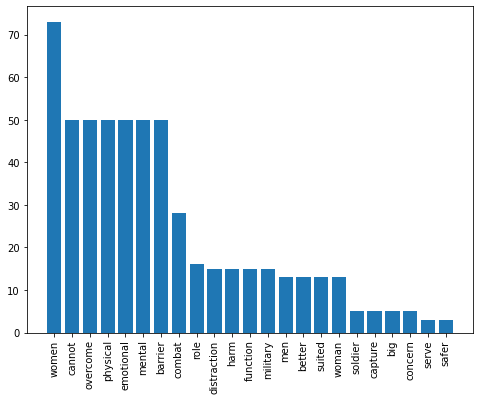

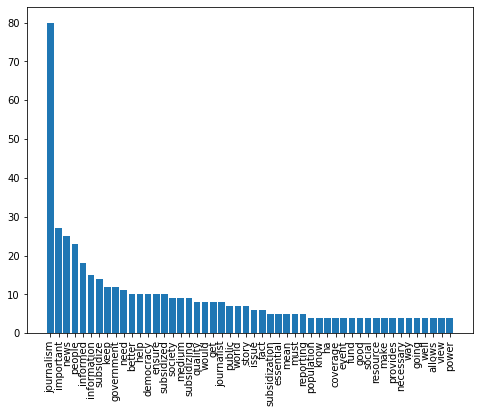

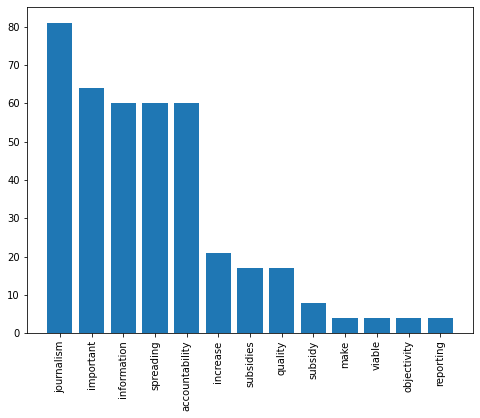

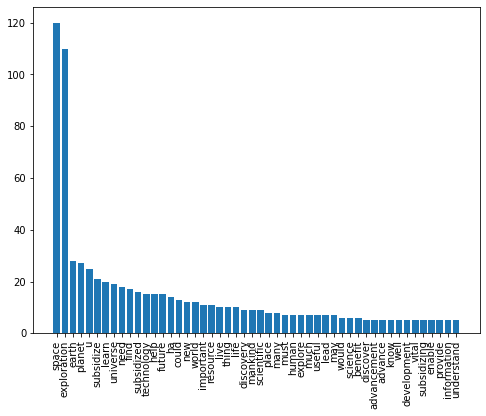

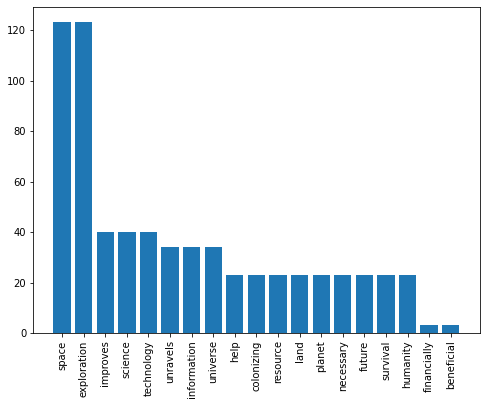

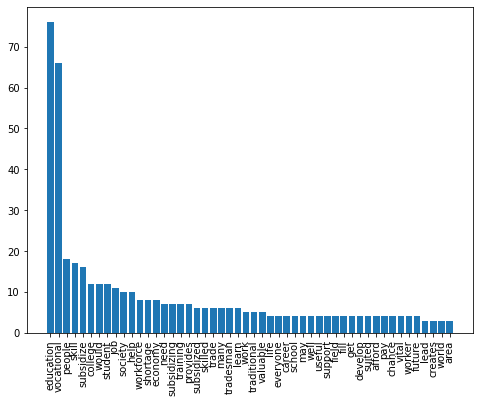

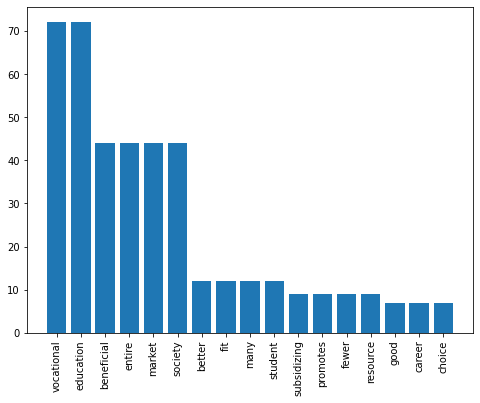

In [116]:
topics = list(df_arguments_labels_key_points_train.topic.unique())
stance=1
for i in range(0,len(topics)):
    topic = topics[i]
    df=df_args_per_stance(df_arguments_labels_key_points_train, topic, stance)
    top_words=visualize_word_frequency_by_topic_stance(i+1, df,50,'argument_tokens_lemma_not_stopwords')
    top_words=visualize_word_frequency_by_topic_stance(i+1, df,50,'key_point_tokens_lemma_not_stopwords')

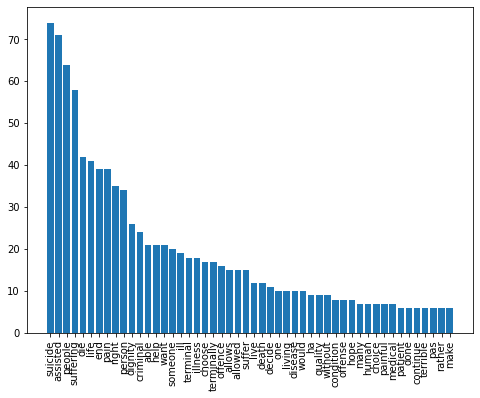

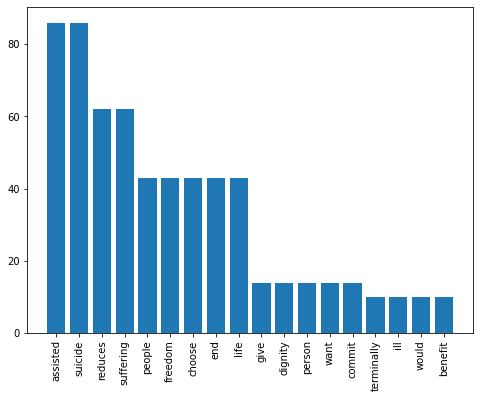

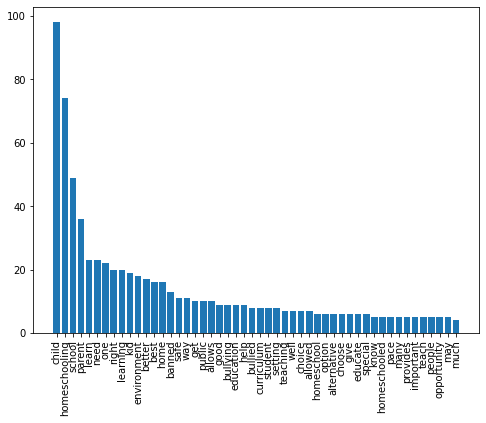

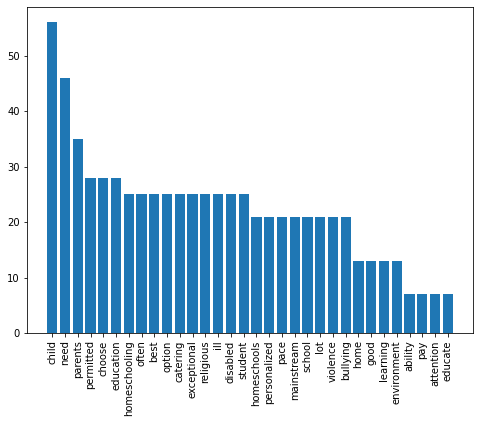

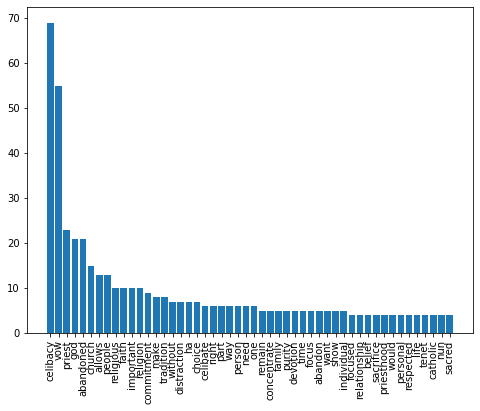

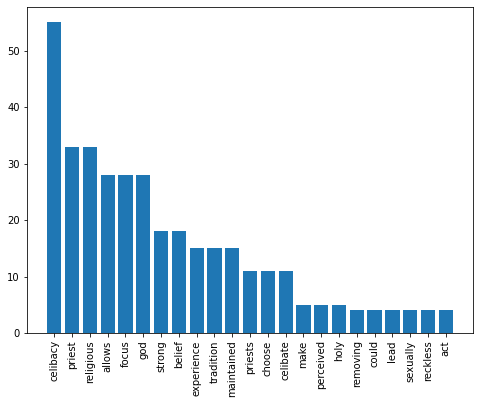

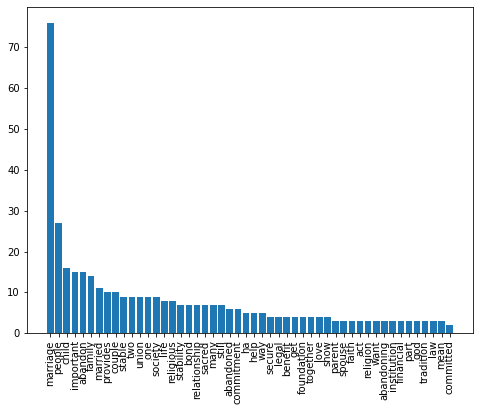

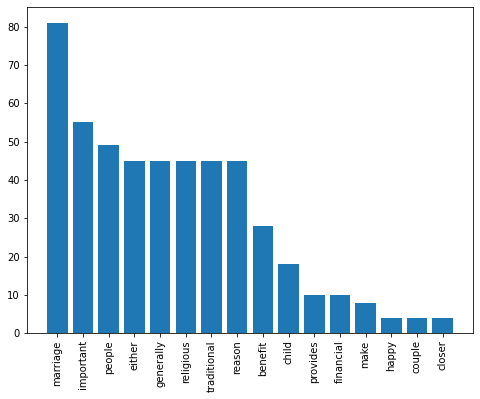

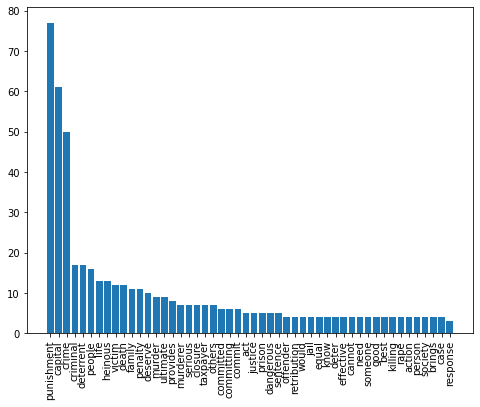

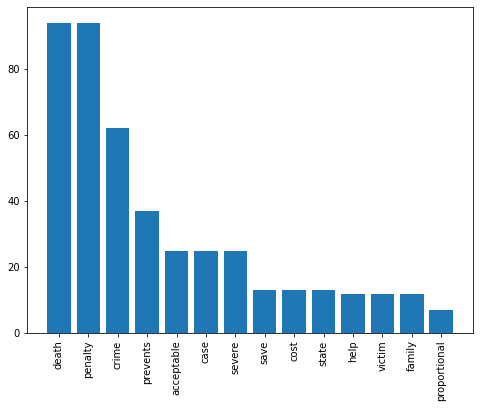

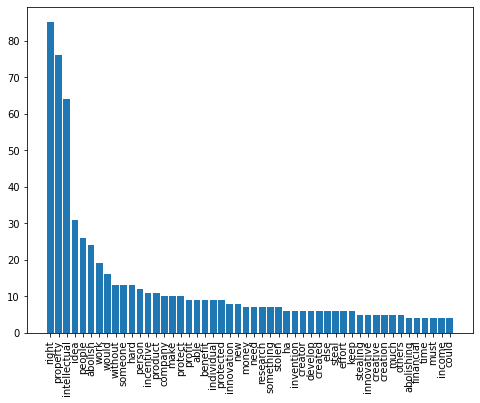

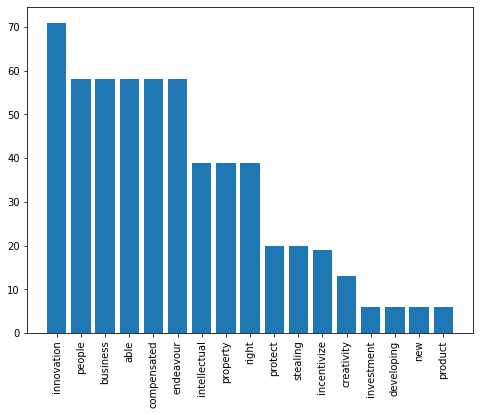

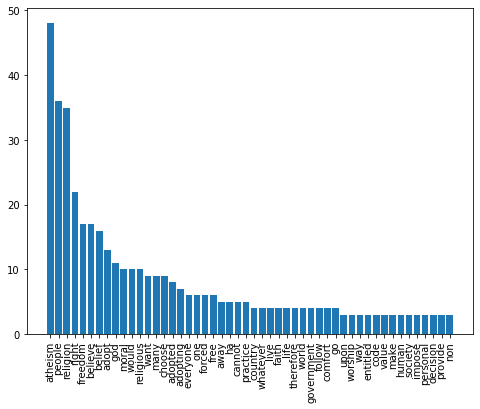

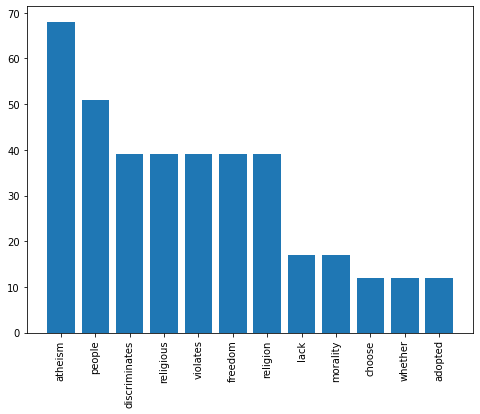

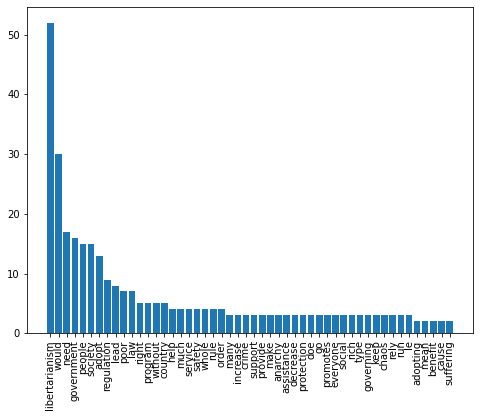

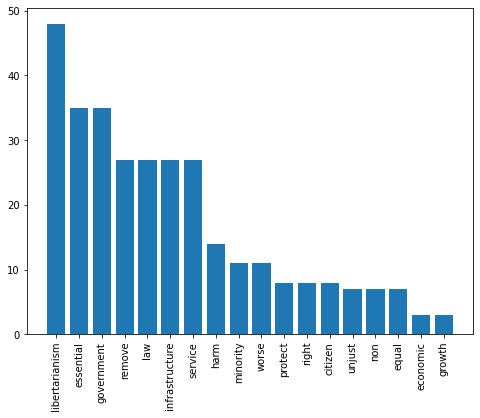

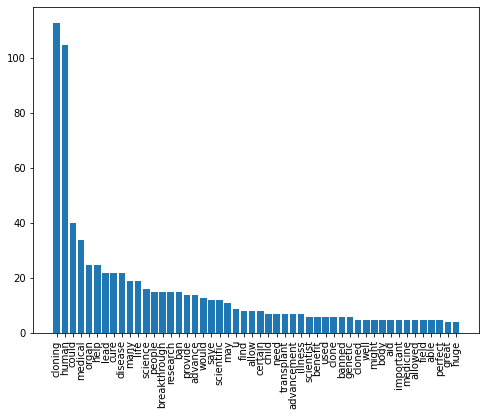

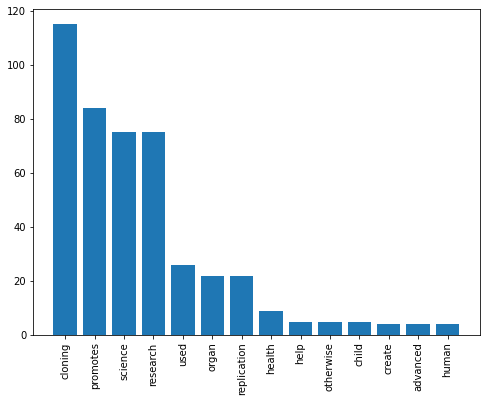

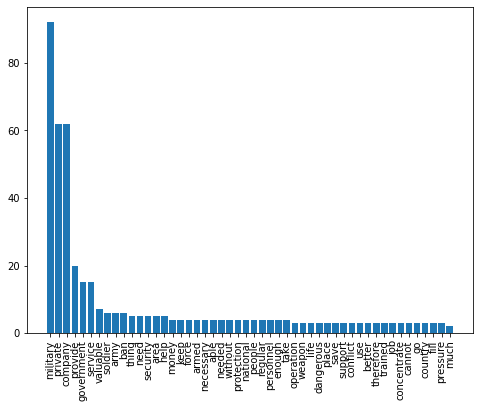

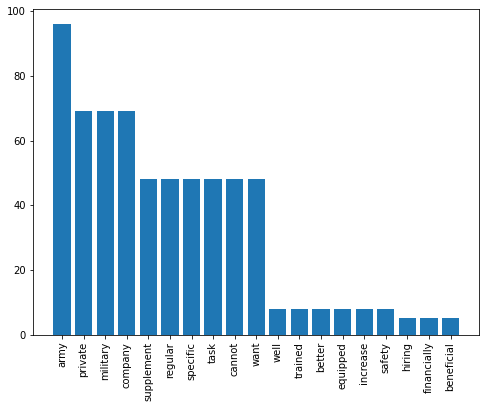

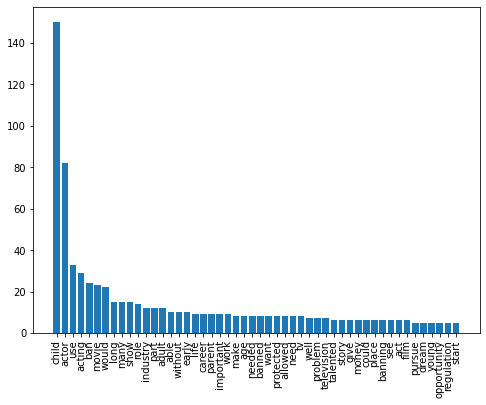

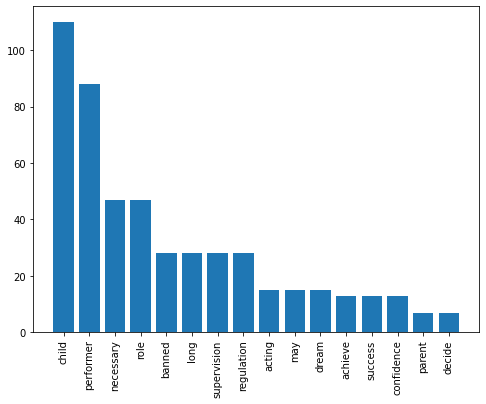

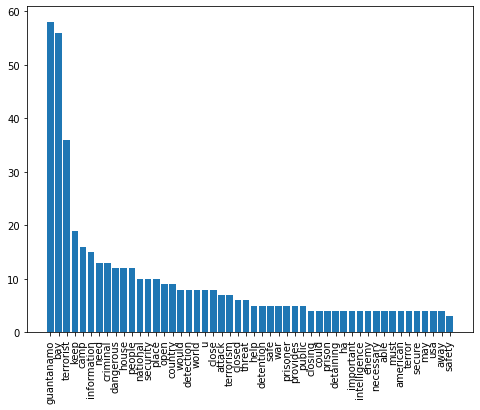

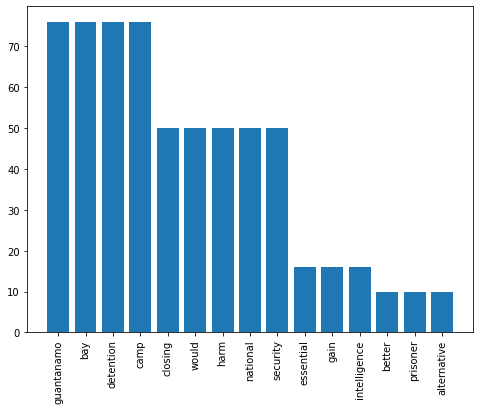

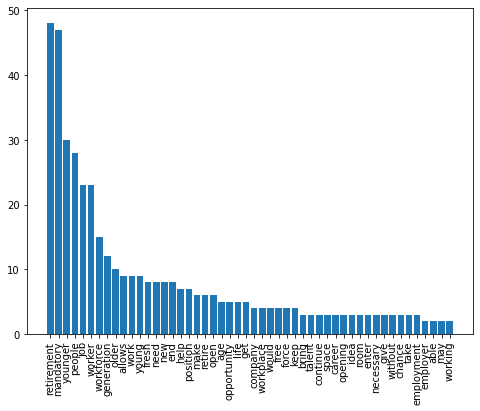

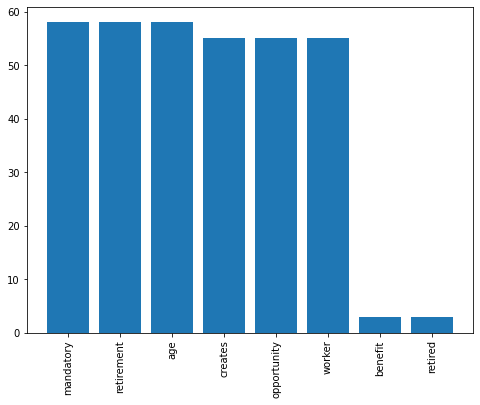

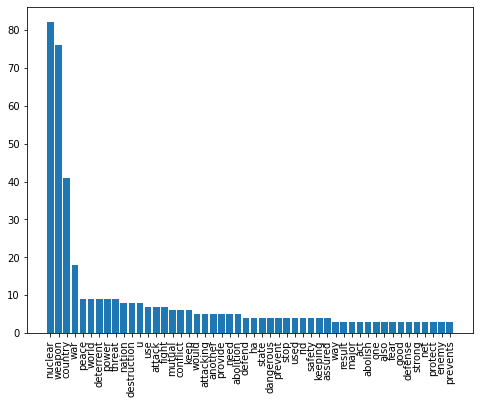

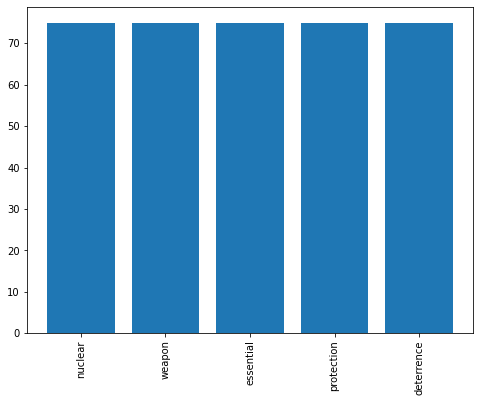

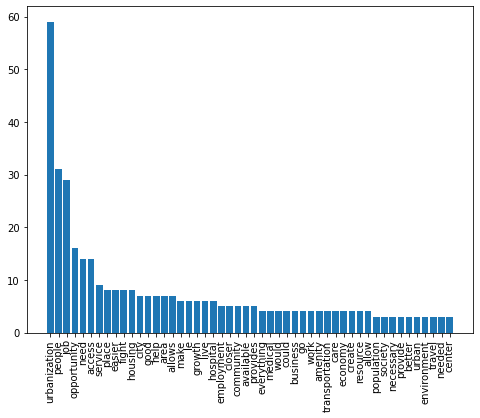

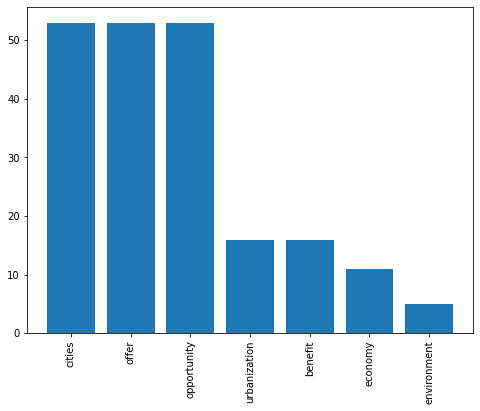

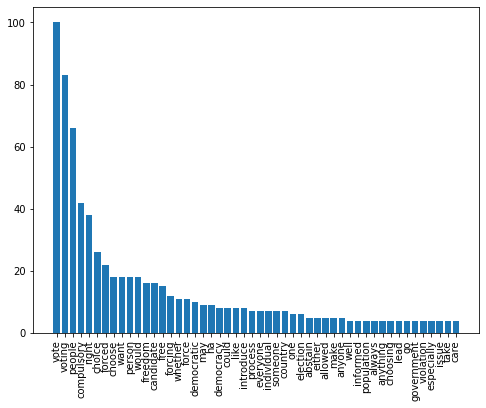

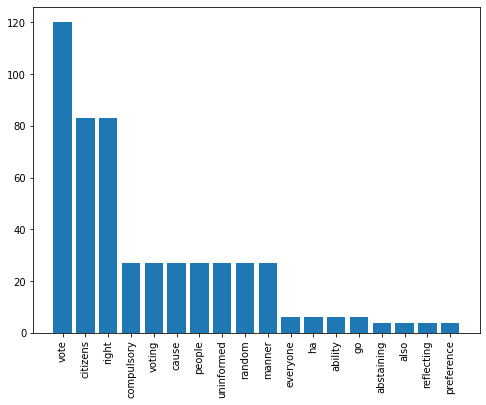

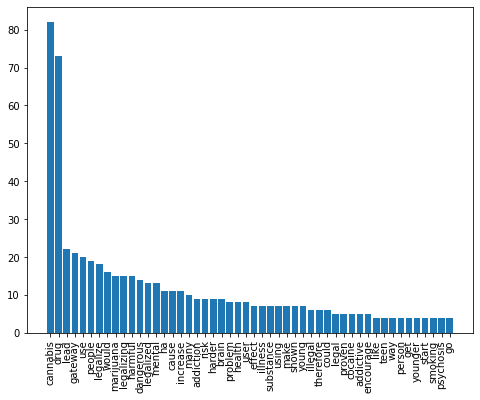

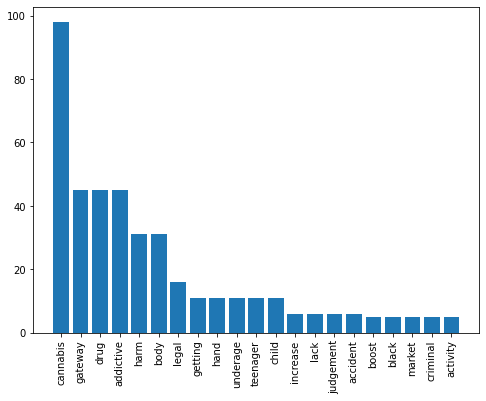

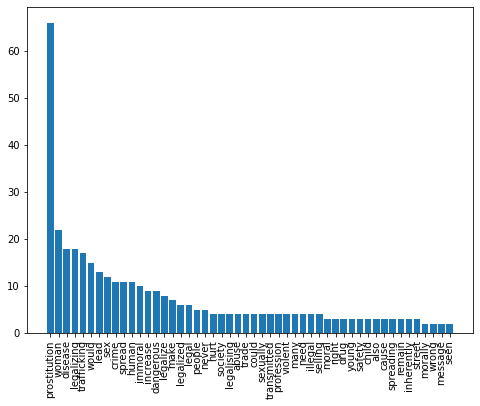

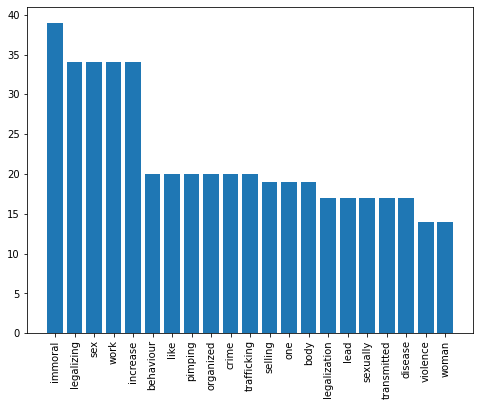

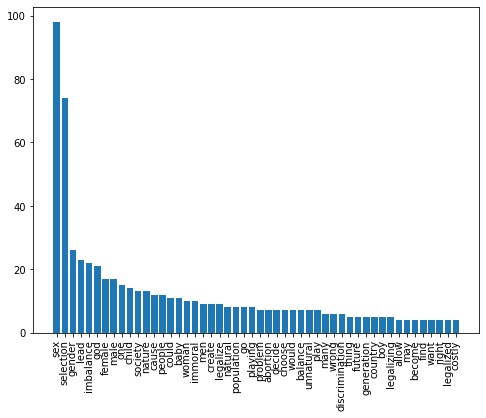

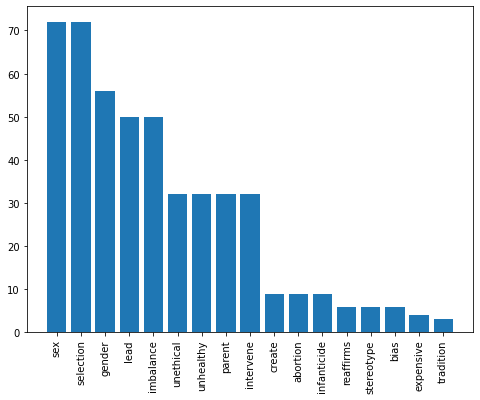

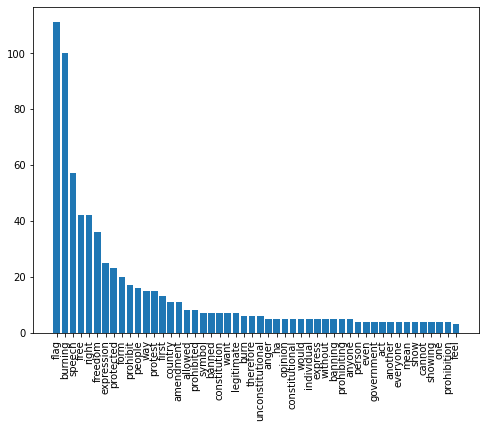

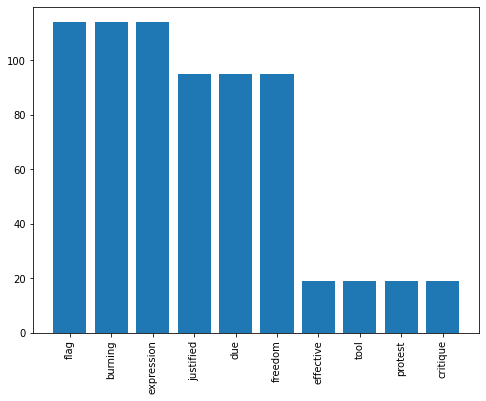

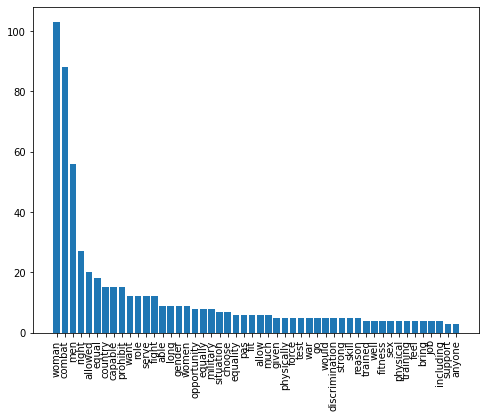

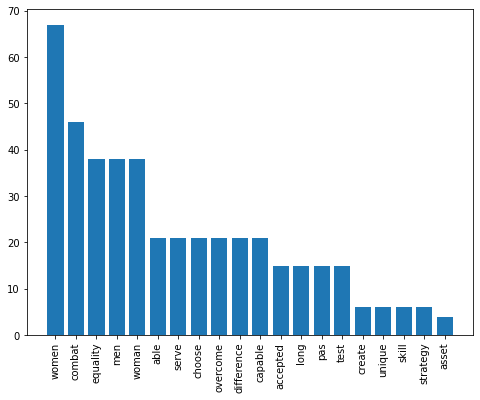

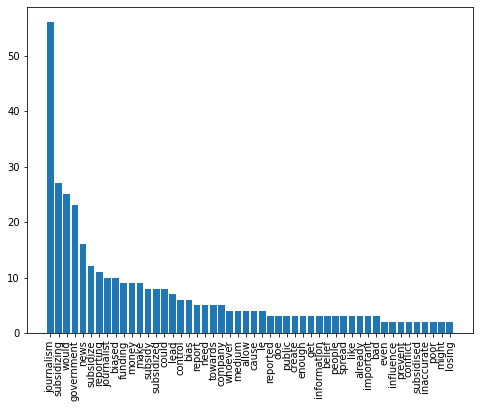

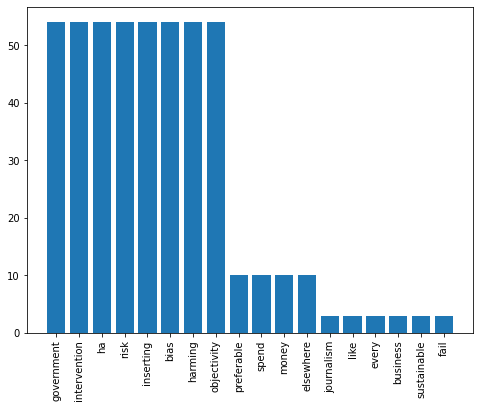

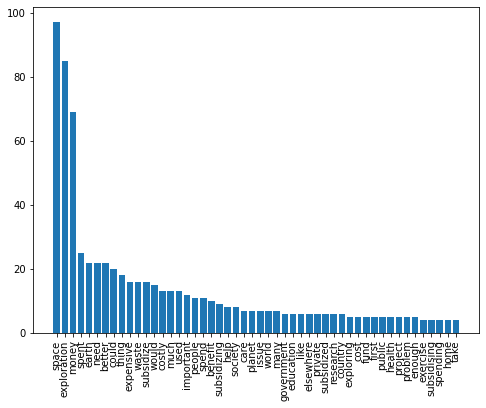

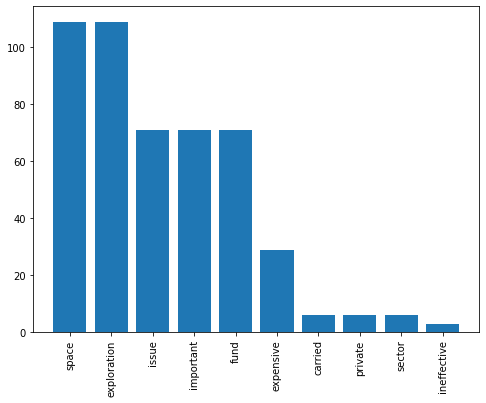

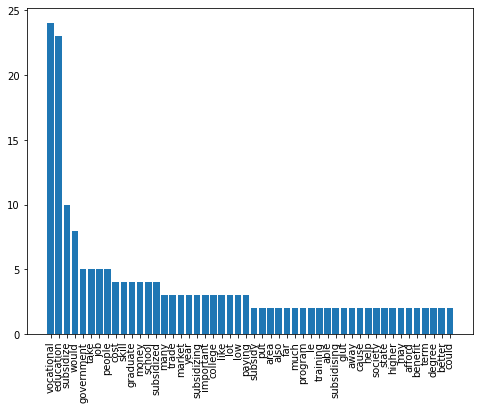

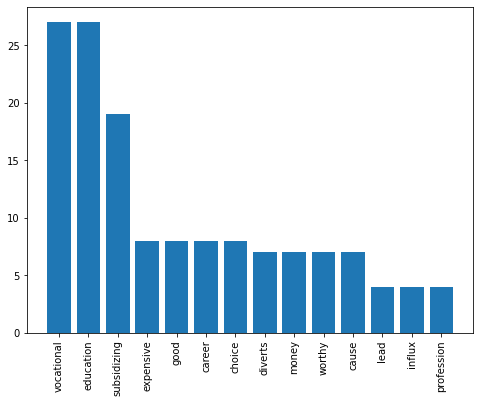

In [118]:
topics = list(df_arguments_labels_key_points_train.topic.unique())
stance=-1
for i in range(0,len(topics)):
    topic = topics[i]
    df=df_args_per_stance(df_arguments_labels_key_points_train, topic, stance)
    top_words=visualize_word_frequency_by_topic_stance(i+1, df,50,'argument_tokens_lemma_not_stopwords')
    top_words=visualize_word_frequency_by_topic_stance(i+1, df,50,'key_point_tokens_lemma_not_stopwords')